При угле alpha = 0.45388 свет попадает в приемник


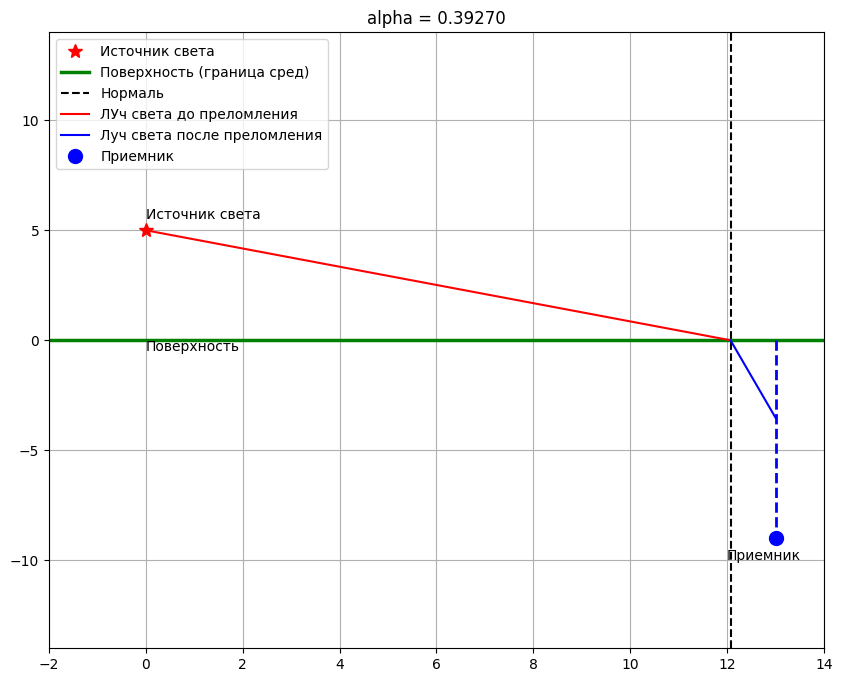

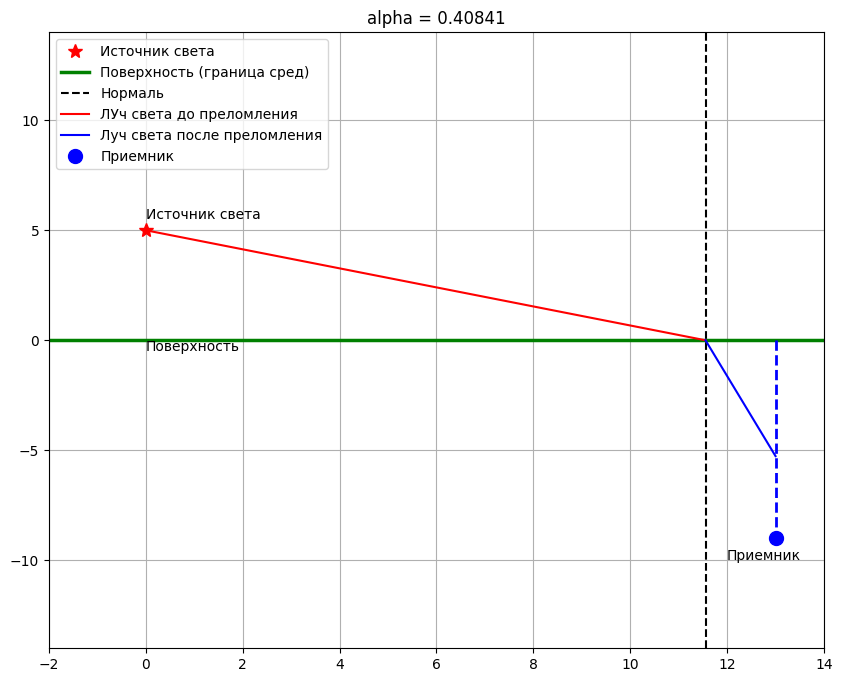

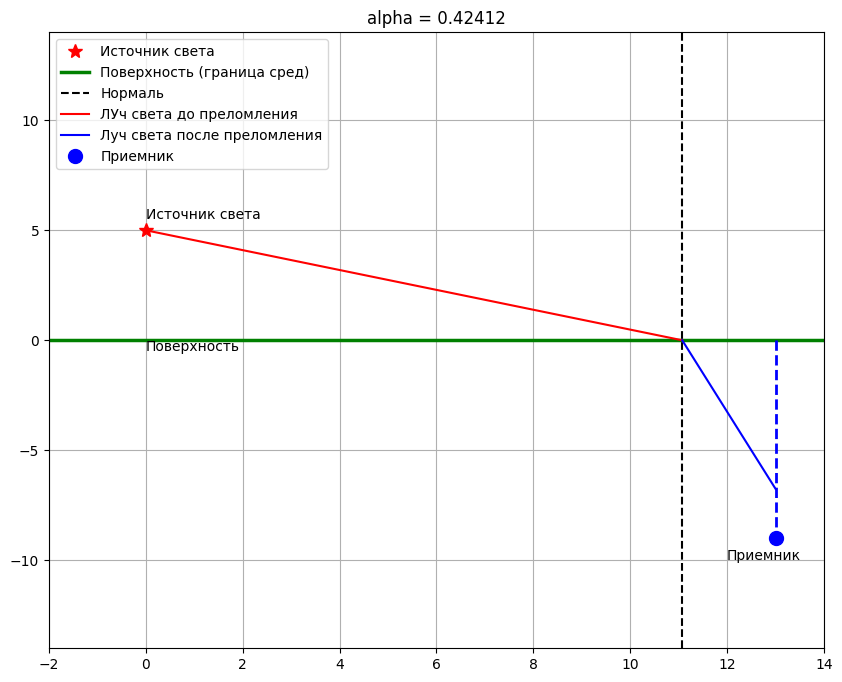

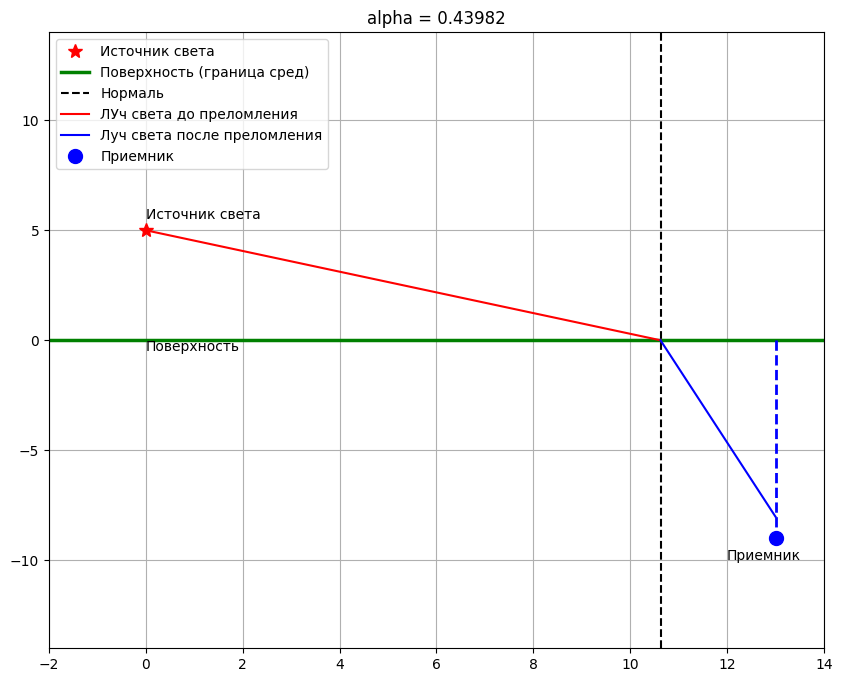

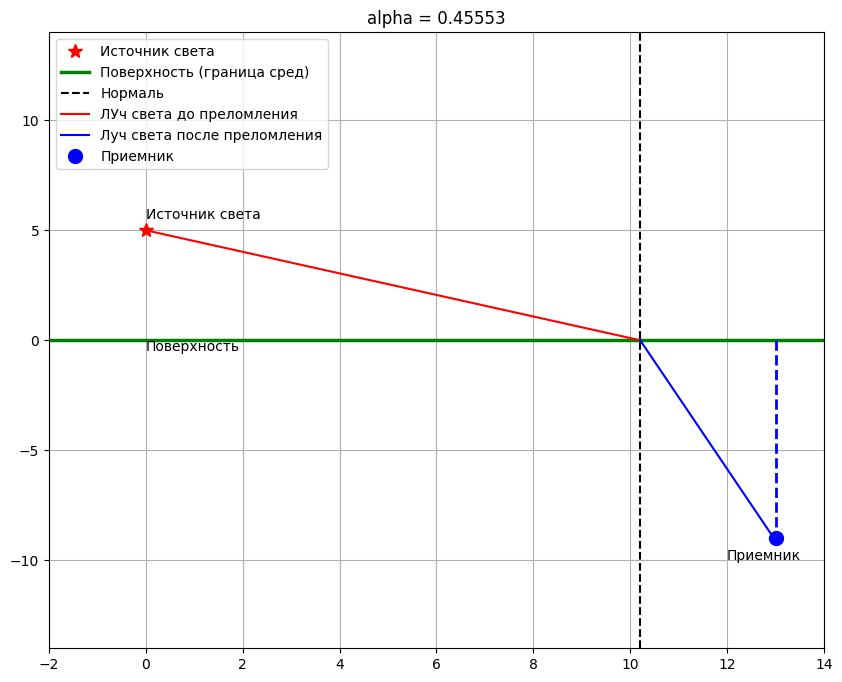

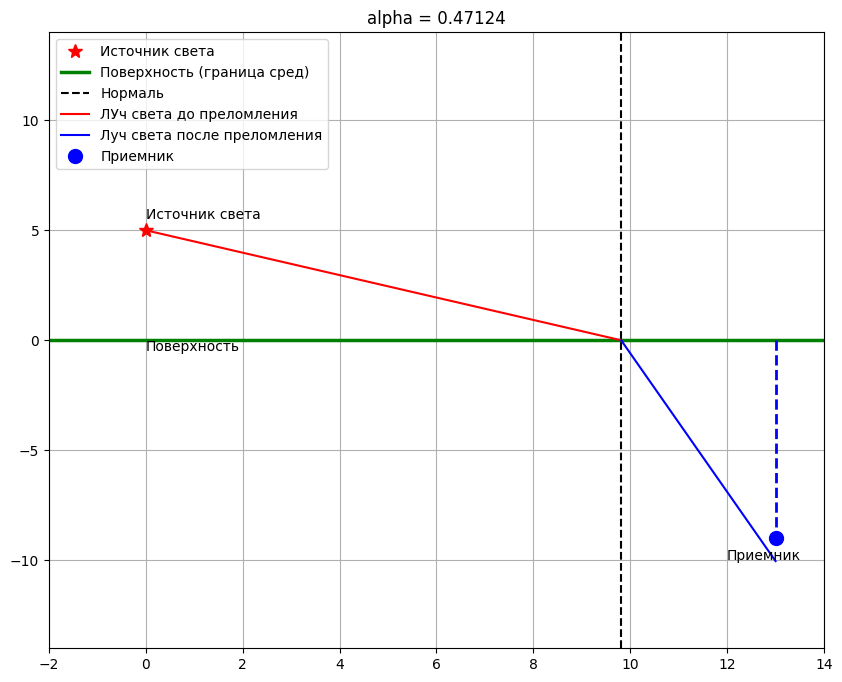

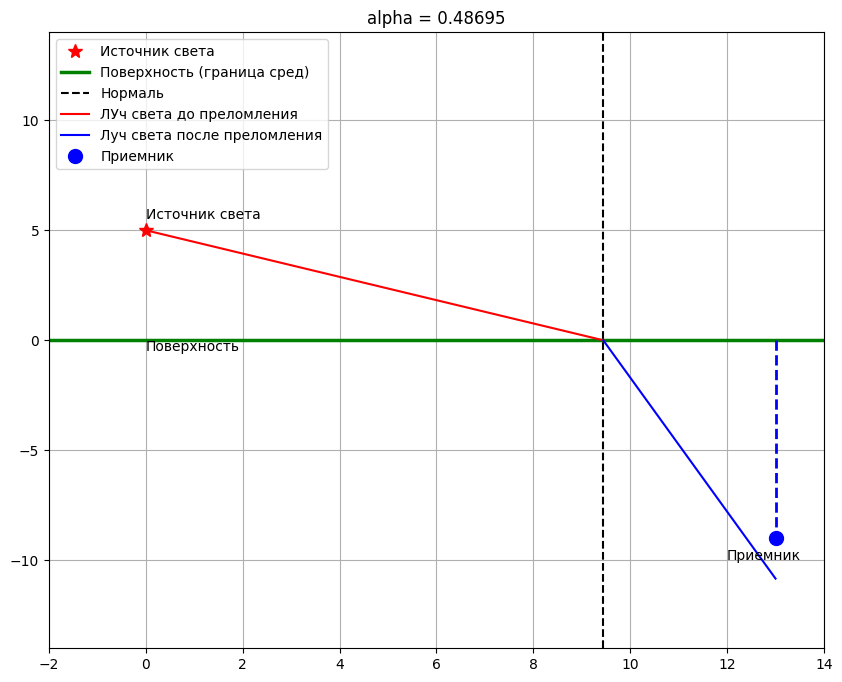

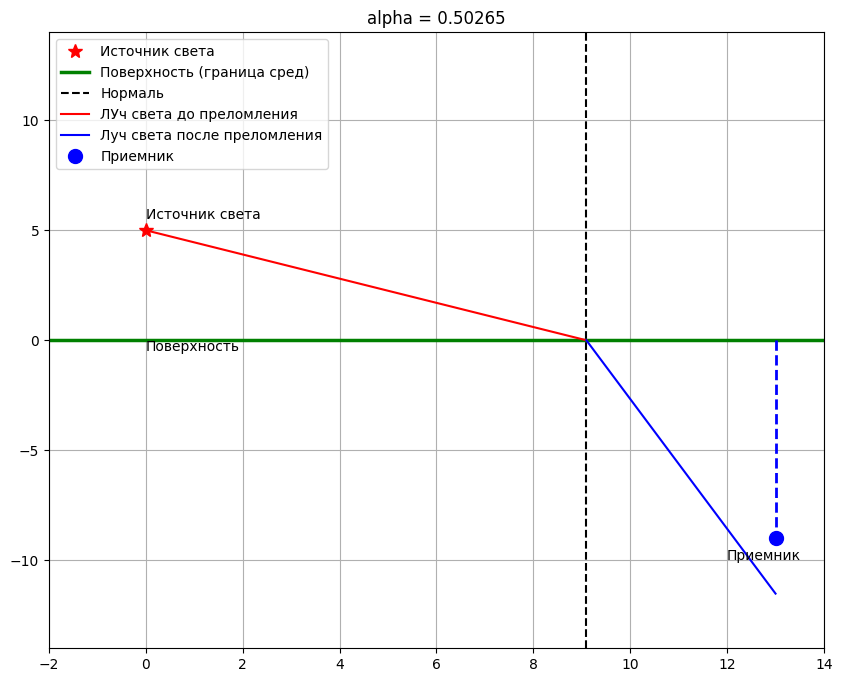

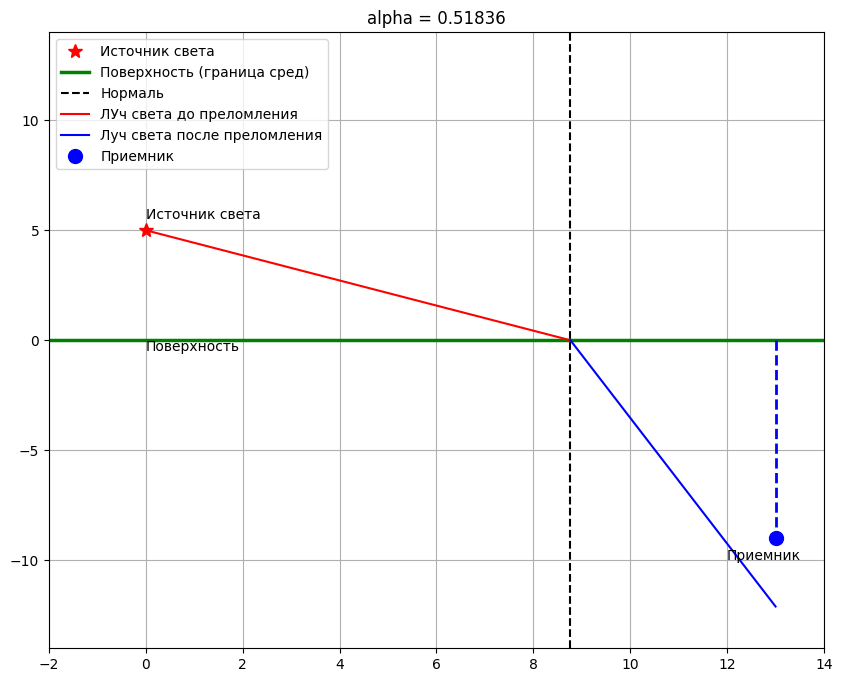

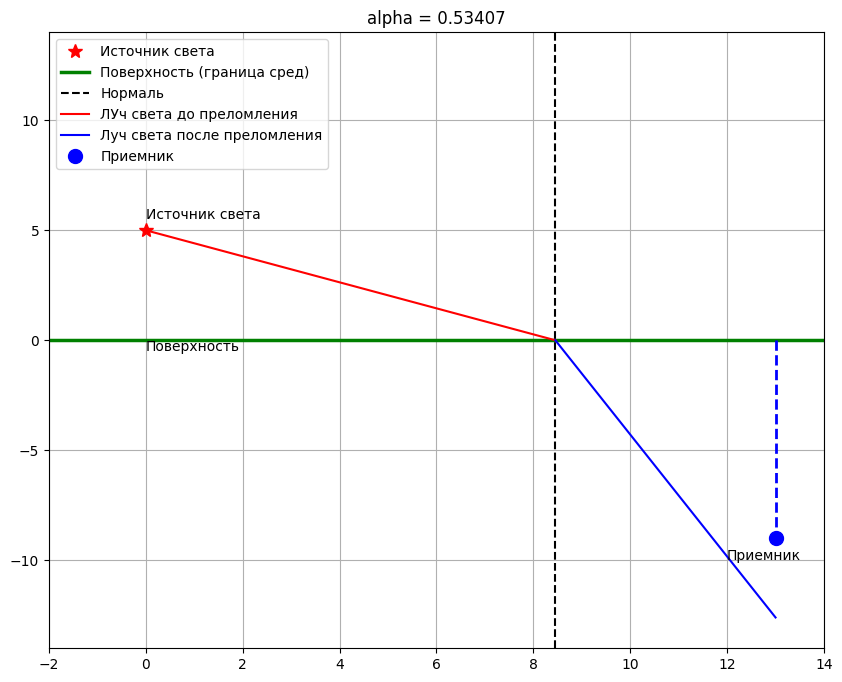

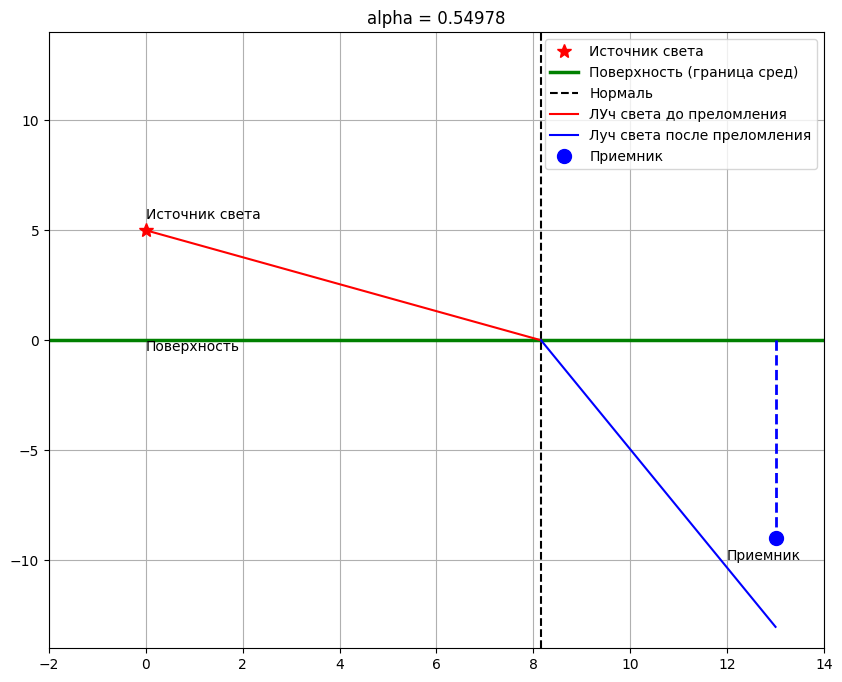

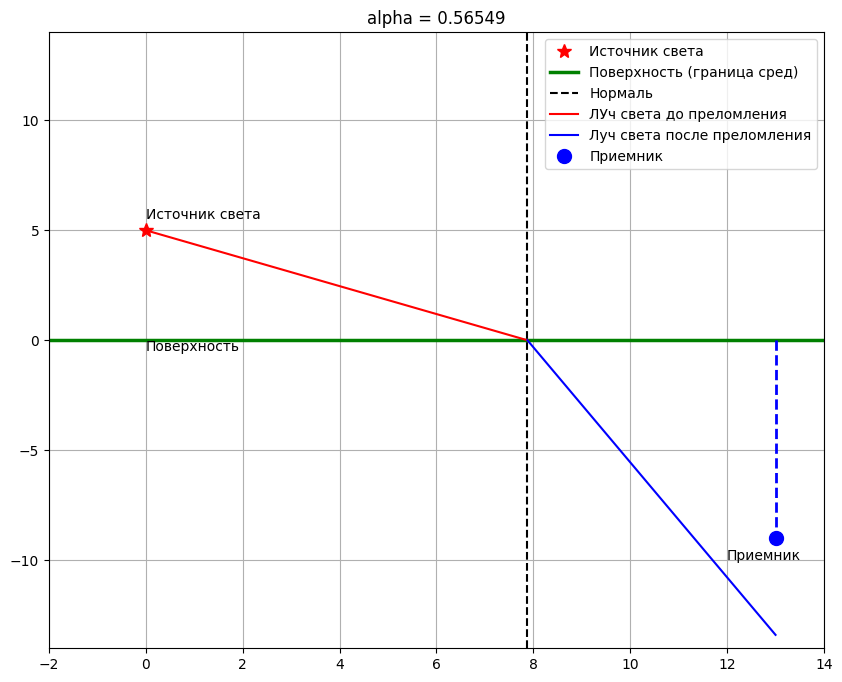

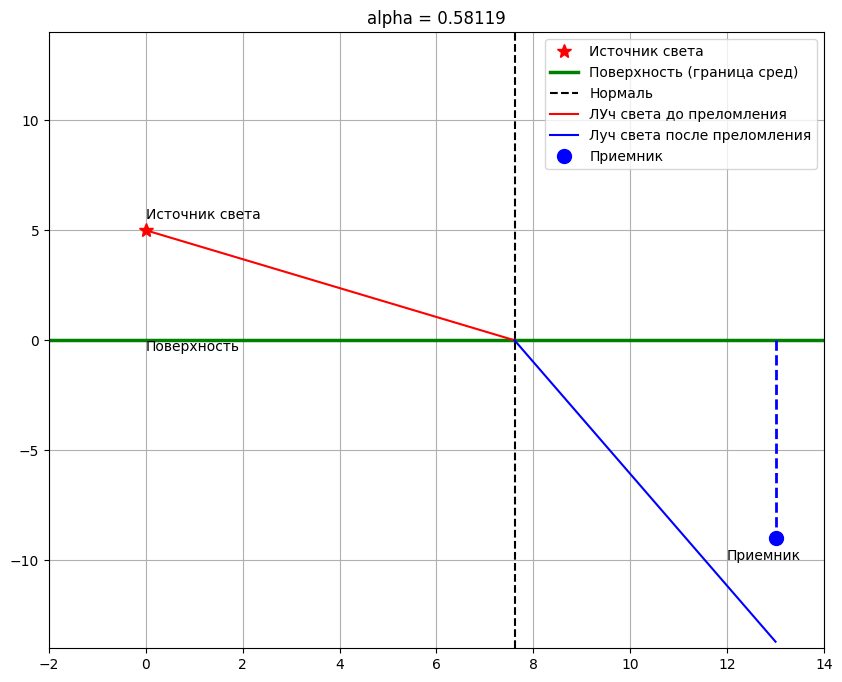

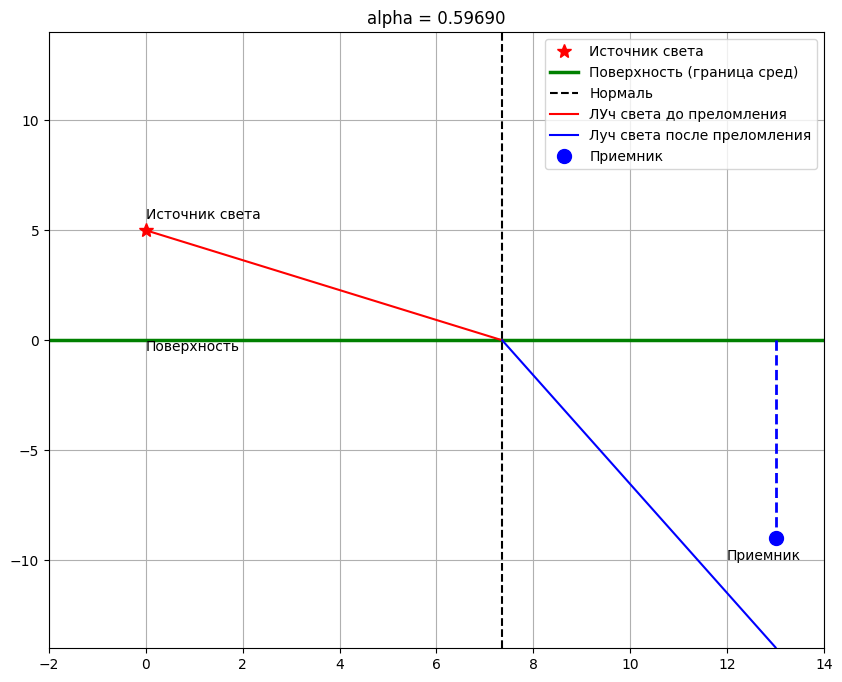

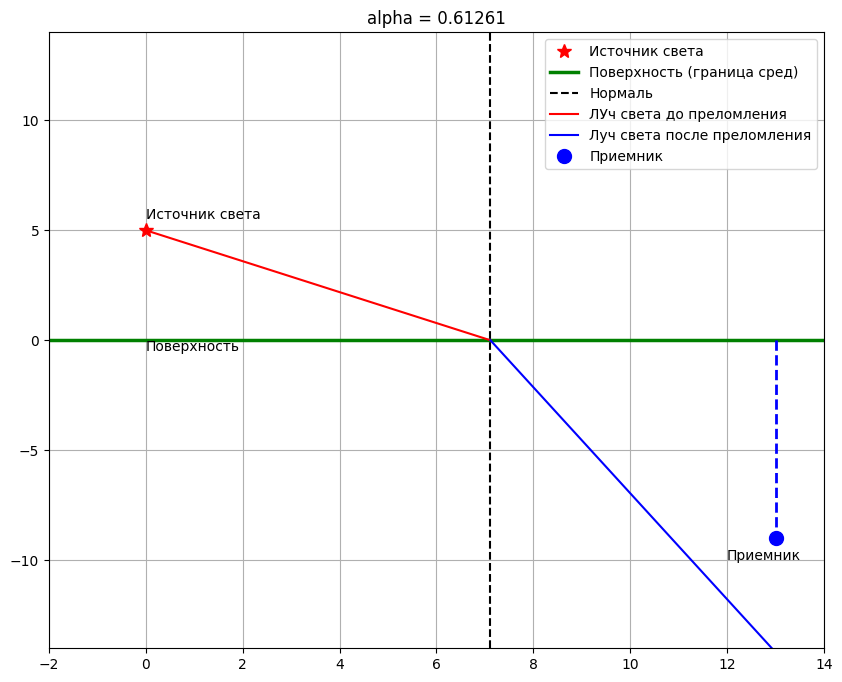

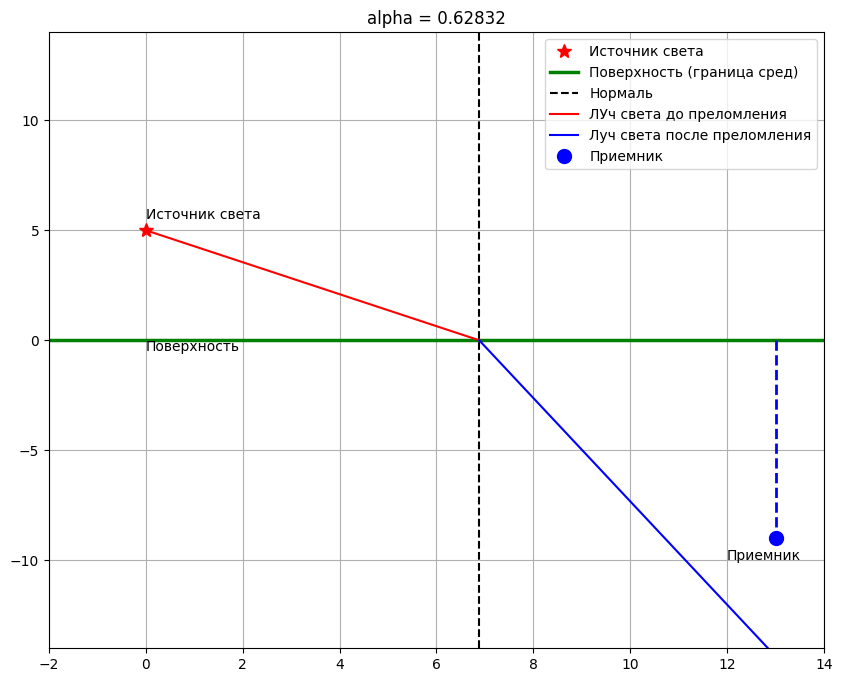

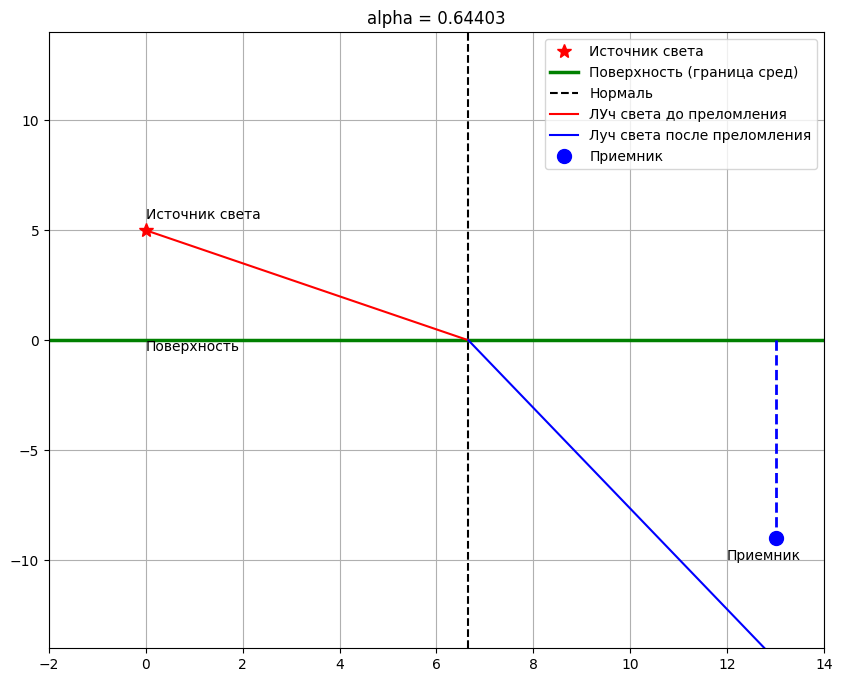

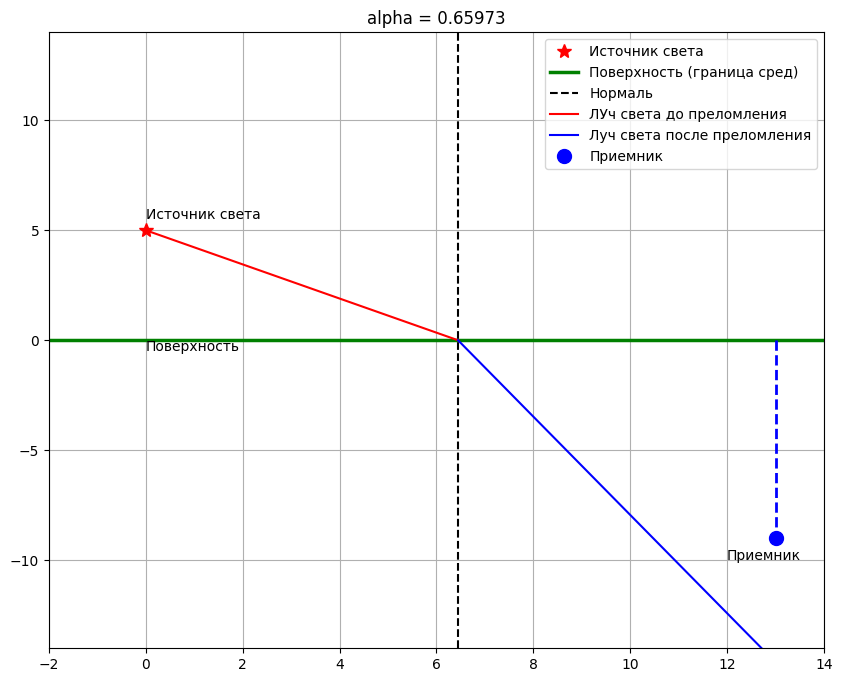

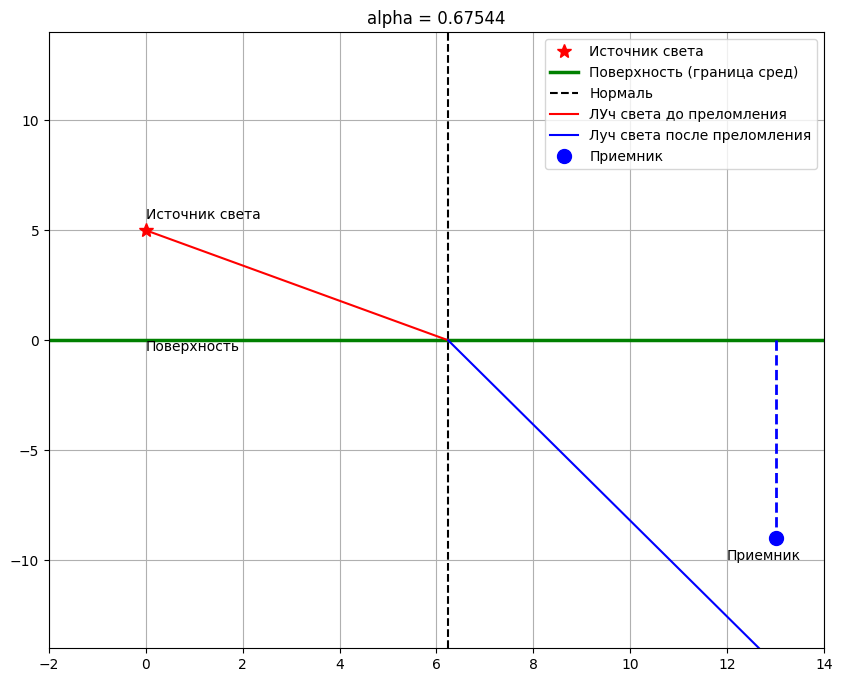

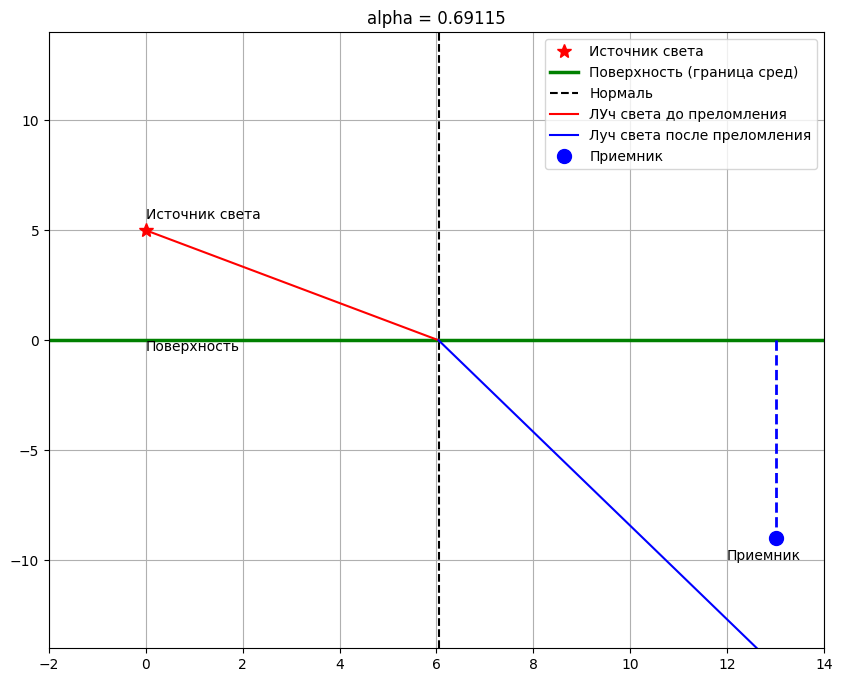

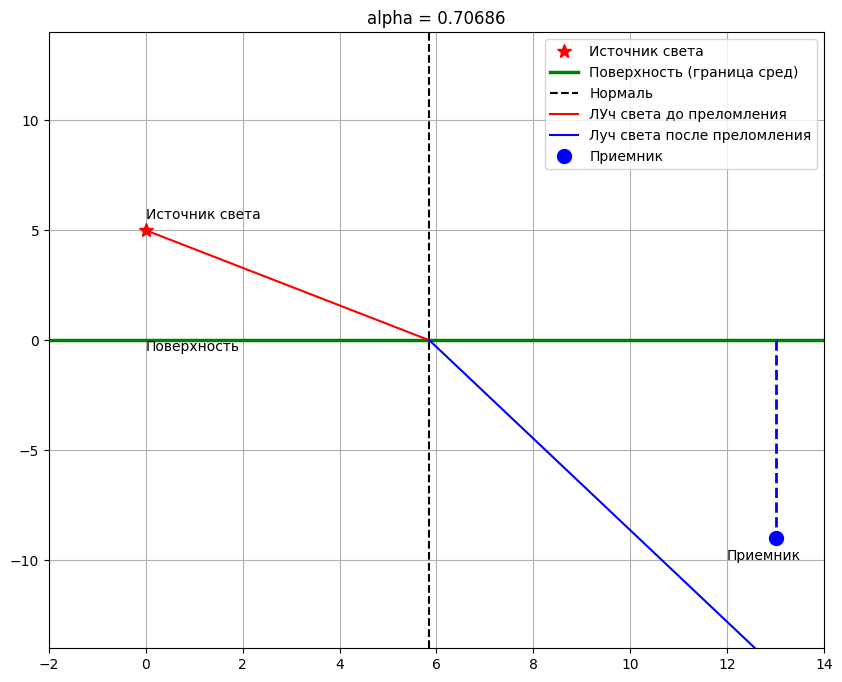

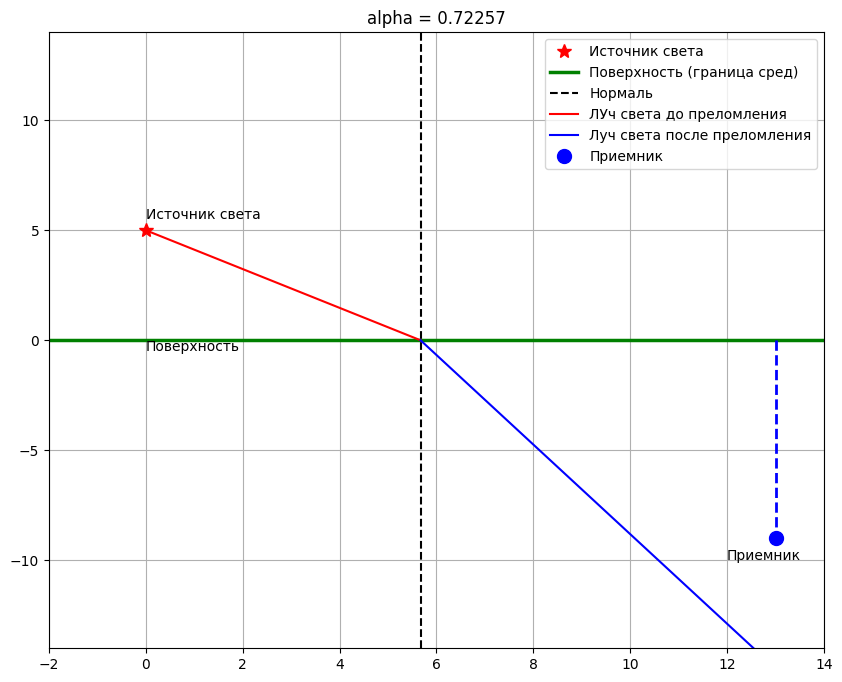

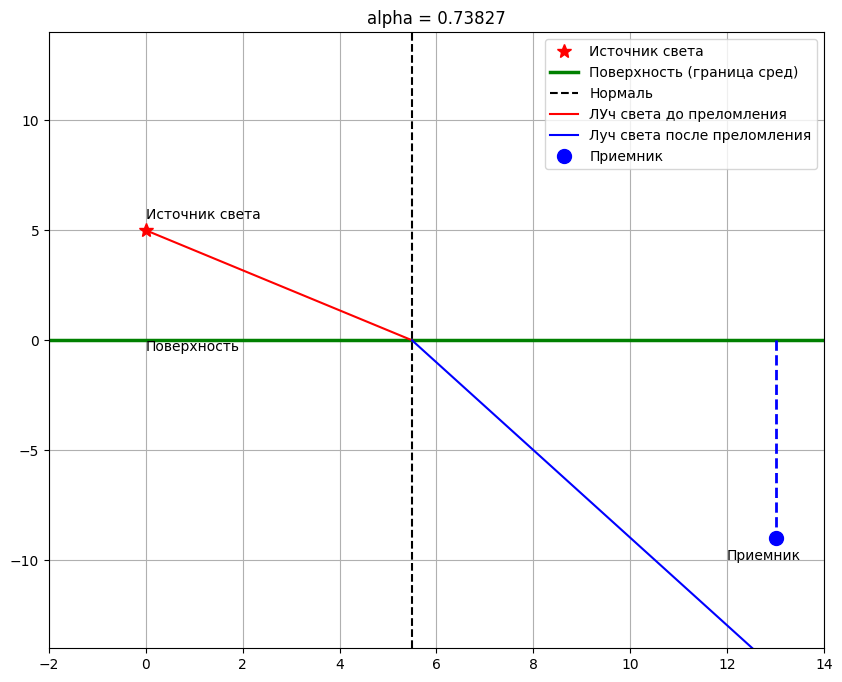

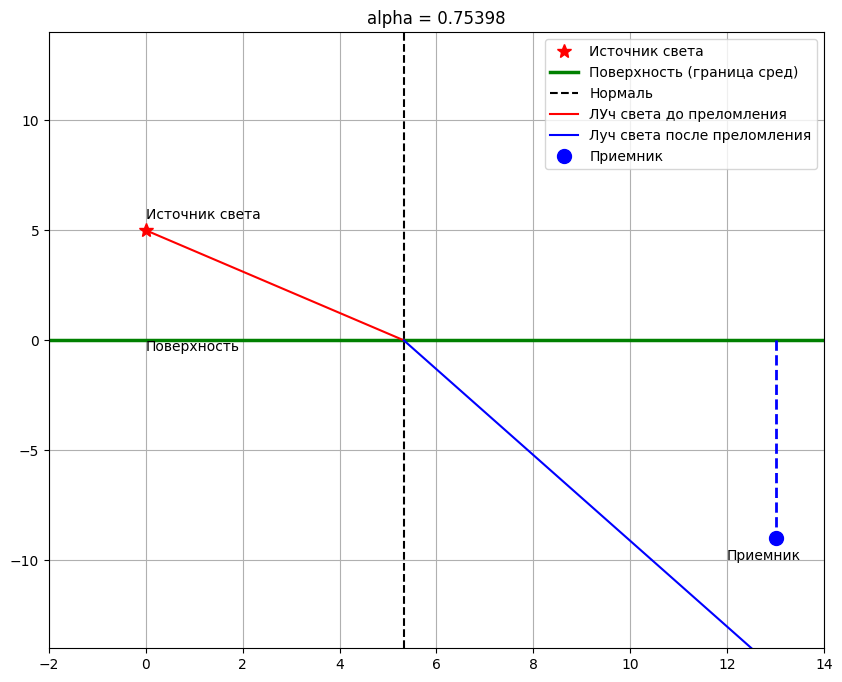

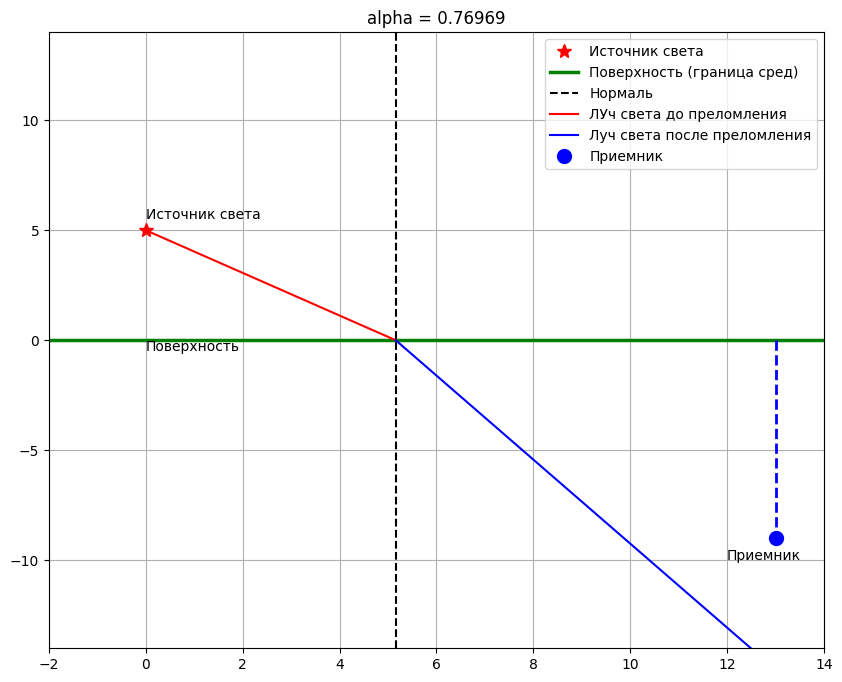

Точность попадания света в приемник: 0.10650


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

def plot_light_refraction(b, d, h, alpha_start, alpha_end, alpha_step, n1, n2):
    """
    b: высота источника света
    d: расстояние до приемника
    h: высота приемника
    alpha_start: начальный угол падения света (относительно нормали)
    alpha_end: конечный угол падения света (относительно нормали)
    alpha_step: шаг изменения угла
    n1: показатель преломления первой среды
    n2: показатель преломления второй среды
    """
    def calculate_alpha_for_hit():
        """
        Встроенная функция для нахождения угла alpha, при котором свет попадает в приемник.
        """
        def equation(alpha):
            theta_refracted = np.arcsin((n1 / n2) * np.sin(alpha))
            return h - (d - (b / np.tan(alpha))) / np.tan(theta_refracted)
        alpha_solution = opt.root_scalar(equation, bracket=[0.01, np.pi/2], method='brentq')
        
        if alpha_solution.converged:
            return alpha_solution.root
        else:
            raise ValueError("Не удалось найти решение для угла alpha")
    
    alpha_hit = calculate_alpha_for_hit()
    print(f'При угле alpha = {alpha_hit:.5f} свет попадает в приемник')
    res = []

    for alpha in np.arange(alpha_start, alpha_end, alpha_step):
        plt.figure(figsize=(10, 8))

        plt.plot(0, b, 'r*', markersize=10, label='Источник света')
        plt.xlim(-2, 14)
        plt.ylim(-14, 14)
        plt.grid(True)

        plt.plot([-2, 14], [0, 0], 'g', linewidth=2.5, label='Поверхность (граница сред)')

        plt.plot([b / np.tan(alpha), b / np.tan(alpha)], [-14, 14], 'k--', label='Нормаль')


        x1 = np.linspace(0, b / np.tan(alpha), 100)
        y1 = -x1 * np.tan(alpha) + b
        plt.plot(x1, y1, 'r', label='ЛУч света до преломления')

        try:
            theta_refracted = np.arcsin((n1 / n2) * np.sin(alpha))  
        except ValueError:
            print(f'Полное внутреннее отражение при alpha = {alpha}')
            continue


        x2 = np.linspace(b / np.tan(alpha), d, 100)
        y2 = (x2 - b / np.tan(alpha)) / np.tan(theta_refracted)
        plt.plot(x2, -y2, 'b', label='Луч света после преломления')


        plt.plot([d, d], [0, -h], 'b--', linewidth=2)
        plt.plot(d, -h, 'ob', markersize=10, label='Приемник')


        res.append((d - b / np.tan(alpha)) / np.tan(theta_refracted))


        plt.text(0, 5.5, 'Источник света')
        plt.text(12, -h - 1, 'Приемник')
        plt.text(0, -0.5, 'Поверхность')

        plt.title(f'alpha = {alpha:.5f}')
        plt.legend()
        plt.show()

    delta = np.abs(np.array(res) - h)
    print(f'Точность попадания света в приемник: {min(delta):.5f}')


b = 5  
d = 13  
h = 9   
alpha_start = np.pi / 8  
alpha_end = np.pi / 4    
alpha_step = np.pi / 200 
n1 = 1.0  
n2 = 1.5

plot_light_refraction(b, d, h, alpha_start, alpha_end, alpha_step, n1, n2)
